<a href="https://colab.research.google.com/github/VoxTrong/XLDC/blob/main/%5BXLDC%5D_0904_BaoTrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xử lý đa chiều - Bài 2  

1.   19110035 - Lê Hoàng Bảo
2.   19110494 - Võ Đức Trọng



# Kmean và NMF

In [ ]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

## NMF

Các bước Non-Negative Matrix Factorization

1. Tạo ngẫu nhiên ma trận W >0 và H > 0 với kích thước (n,r) và (r,p)
2. Lần lược cập nhật lại W và H như sau :

$$H_{i,j} \leftarrow  H_{ij}\frac{(W^TX)_{i,j}}{(W^TWH)_{ij}} $$
$$W_{i,j} \leftarrow  W_{ij}\frac{(X^TW)_{i,j}}{(WHH^T)_{ij}} $$

Cho đến khi có được: $ \left\| A -WH \right\| $ đạt được giá trị tối ưu.


In [ ]:
A = np.random.uniform(1,10,[10,5])
A

array([[1.85650871, 6.29773113, 8.81425509, 8.71468952, 4.65705562],
       [7.46895682, 5.36388711, 6.16547151, 9.9413347 , 4.09994423],
       [2.3467049 , 2.874634  , 7.12383596, 4.94838734, 7.36834306],
       [4.75985724, 2.81417812, 8.53597756, 9.75359368, 8.76986868],
       [9.75254914, 1.72517577, 1.58516585, 5.93818177, 6.59064114],
       [3.26144792, 6.16474413, 1.51958343, 7.54662947, 8.51327188],
       [5.49095   , 1.80047591, 2.67403776, 2.9529767 , 3.2219423 ],
       [6.08517854, 6.20171248, 1.6186948 , 9.35773758, 3.44647732],
       [3.35298823, 8.79919912, 1.46135323, 7.66531309, 8.69696672],
       [3.0702137 , 9.01791547, 9.51703188, 2.38669123, 2.51625631]])

In [ ]:
def random_intWH(A,r):
  n = A.shape[0] # n là số lượng mẫu của data
  p = A.shape[1] # p là số lượng features
  W = np.random.uniform(1,2,(n,r))
  H = np.random.uniform(1,2,(r,p))
  return W,H

In [ ]:
def update_WH(A,W,H):
  # Update H
  W_TA = W.T@A
  W_TWH = W.T@W@H
  for i in range(np.size(H, 0)):
      for j in range(np.size(H, 1)):
          H[i, j] = H[i, j] * W_TA[i, j] / W_TWH[i, j]
  # Update W
  AH_T = A@H.T
  WHH_T =  W@H@H.T
  for i in range(np.size(W, 0)):
      for j in range(np.size(W, 1)):
          W[i, j] = W[i, j] * AH_T[i, j] / WHH_T[i, j]
          
  return W,H

In [ ]:
def NMF(A,k):
    W ,H = random_intWH(A,k)
    norms = [0]
    e = 1.0e-10
    while True :
        W,H = update_WH(A,W,H)        
        norm = np.linalg.norm(A - W@H, 'fro')
        if round(norms[-1],6) == round(norm,6) and norms != None:
          norms.append(norm)
          break
        norms.append(norm)
    return W ,H ,norm

In [ ]:
WH=NMF(A,2)
W = WH[0]
H = WH[1]
WH[2]

12.729070572161795

In [ ]:
np.linalg.norm(A-W@H,'fro')

12.729070572161795

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W_sk = model.fit_transform(A)
H_sk = model.components_

In [ ]:
np.linalg.norm(A-W_sk@H_sk,'fro')

12.728918830284528

## K-means


In [ ]:
means = [[6, 6], [15, 8], [8, 13]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

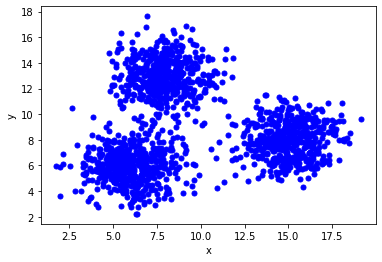

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

Khởi tạo cái tâm cục ngẫu nhiên

In [ ]:
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

Gán nhãn các điểm tới tâm gần nhất

In [ ]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  return np.argmin(D, axis = 1)

Cập nhật lại tâm bằng cách lấy trung bình các điểm trong cụm đó

In [ ]:
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    Xk = X[labels == k, :]
    centers[k,:] = np.mean(Xk, axis = 0)
    
  return centers

Điều kiện dừng

In [ ]:
def kmeans_has_converged(centers, new_centers):
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))

Hàm vẻ các cụm để dễ hình dung

In [ ]:
def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
 
  for i in range(n_cluster):
    data = X[labels == i]
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i))
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i))
  plt.legend() 
  plt.show()

In [ ]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

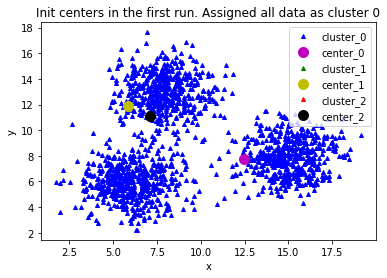

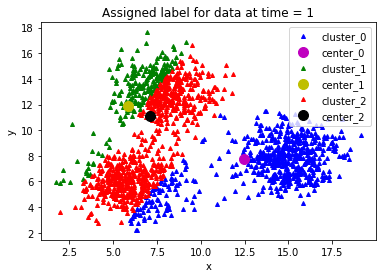

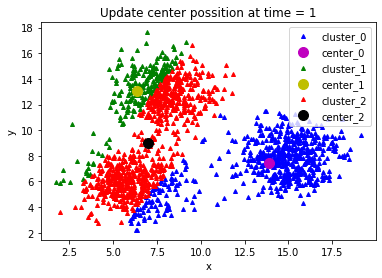

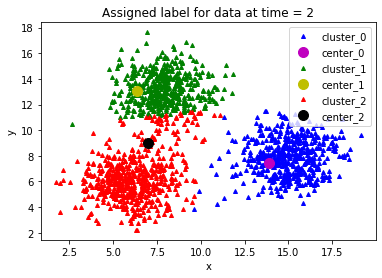

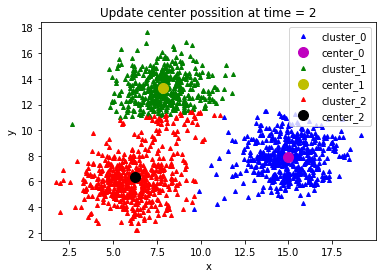

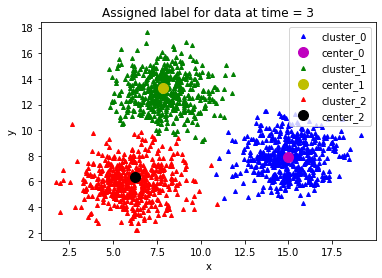

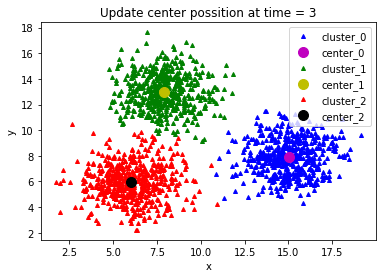

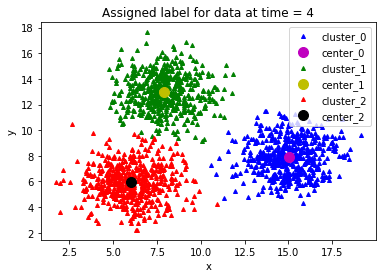

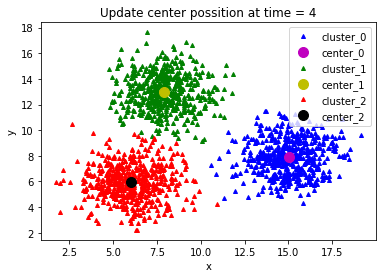

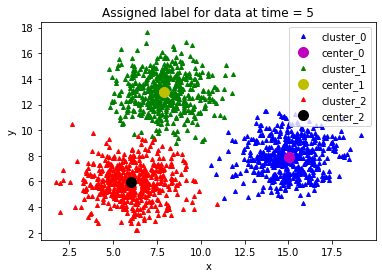

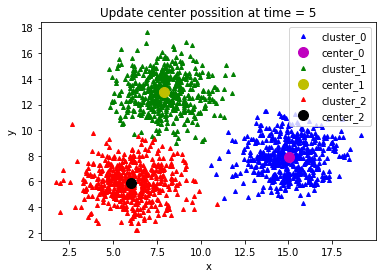

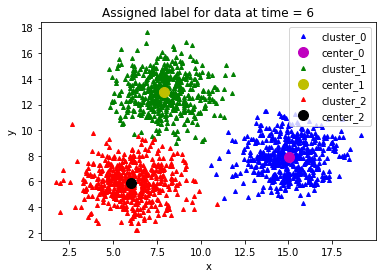

Done! Kmeans has converged after 5 times


In [ ]:
init_centers = kmeans_init_centers(X, n_cluster)
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
 
print('Done! Kmeans has converged after', times, 'times')
 

## Nhận xét

- Ta thấy được thuật toán Kmeans và NMF có điểm giống nhau là: Khởi tạo ngẩu nhiên cái cụm và ma trân.
- Sau đó lần lược cập nhật lại tâm cụm cũng như cập nhật lại ma trân W và H cho tới khi đạt được giá trị tối ưu nhất

# t-SNE

Gồm 2 giai đoạn:  


1.   Xây dựng xác suất trên các cặp đối tượng trong high-dimensional. Các cặp đối tượng tương đồng (similar) thì có xác suất cao hơn và ngược lại.  
2.   Xác định xác suất tương đương trong low-dimensional.  



**Perplexity formula:**
$$ 2^{H(p)}=2^{-\sum_{x} p(x) \log _{2} p(x)} $$

**1. Tác động của hyperparameters**

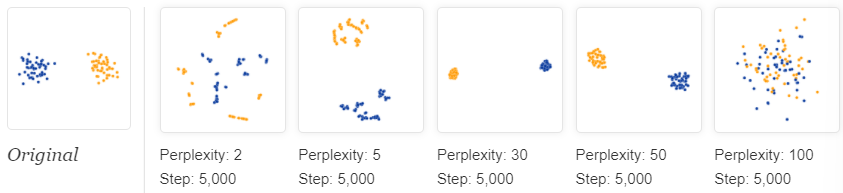

Ở minh hoạ trên, ta thấy càng tăng *perplexity* thì tới ngưỡng $30-50$, các clusters được tách ra rõ ràng. Tuy nhiên khi càng tăng ($100$) thì xảy ra hiện tượng hợp nhất.  
⇒ Perplexity < 2 Number of points.

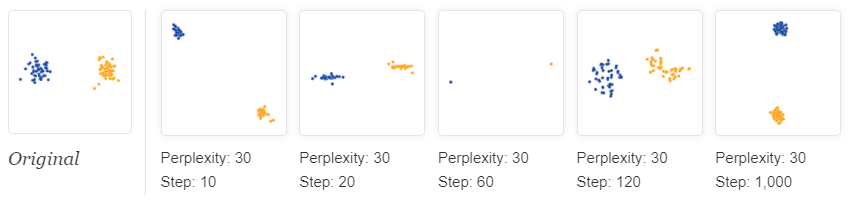

Trong minh hoạ tiếp theo, perplexity được chọn là $30$. Khi tăng dần các steps thì hình thái của các clusters sẽ thay đổi cho đến khi đạt được sự ổn định (hội tụ).
⇒ Với perplexity nhỏ và iteration cao (tỉ lệ 1:100) thì hội tụ dễ dàng.

**2. Kích thước các cluster không là vấn đề**  

Minh hoạ dưới đây cho ta kết luận, standard deviation (size) của cluster không có ý nghĩa trong thuật toán t-SNE. 

*   Thuật toán t-SNE **điều chỉnh "khoảng cách"** của nó với các biến thể mật độ khu vực trong tập dữ liệu. Kết quả là, nó **mở rộng một cách tự nhiên các cụm dày đặc** và **thu hẹp các cụm thưa thớt lại**, *tối thiểu hóa kích thước cụm*. 

*   Nói rõ hơn, đây là một hiệu ứng khác với thực tế đang diễn ra là bất kỳ kỹ thuật giảm kích thước nào cũng sẽ làm sai lệch khoảng cách. (Xét cho cùng, trong ví dụ này, bắt đầu tất cả dữ liệu đều là hai chiều.) Thay vào đó, **cân bằng mật độ** xảy ra theo thiết kế và là một tính năng có thể dự đoán được của t-SNE.


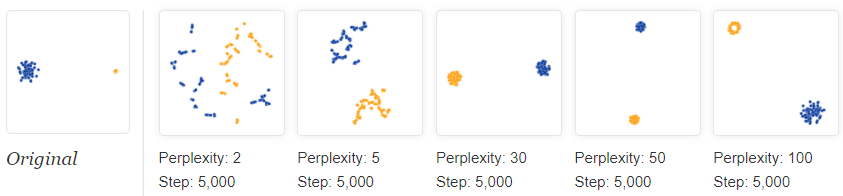

**3. Khoảng cách các cụm không có nhiều ảnh hưởng**

Khi perplexity thấp, **scale của các cụm** đều trông như nhau. Tuy nhiên, nếu so sánh giữa perplexity giữa $50$ và $100$, ta nhận ra là một cụm (màu xanh lá) có vẻ nhỏ hơn các cụm còn lại.

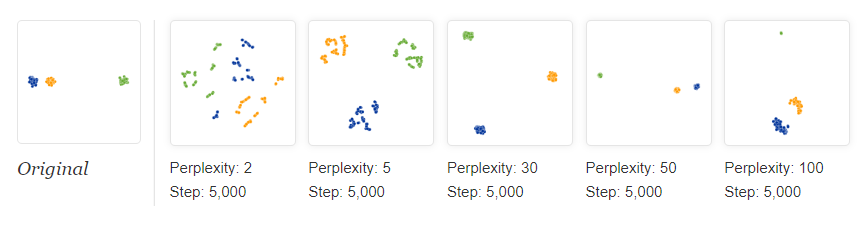

Trường hợp dưới đây, khi tăng mật độ của từng cụm thì dù perplexity $50$ hay $100$ thì cũng không khác biệt là bao và cũng không cho kết quả tốt.

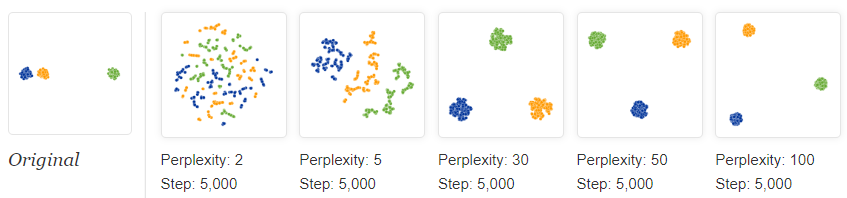

> Tin xấu là việc nhìn thấy hình học toàn cầu đòi hỏi **sự phức tạp trong việc tinh chỉnh**. Dữ liệu trong thế giới thực có thể sẽ có nhiều cụm với số lượng phần tử khác nhau. Có thể **không có một giá trị độ phức tạp nào sẽ xác định được khoảng cách trên tất cả các cụm** và đáng buồn là độ phức tạp là một tham số toàn cục.